<a href="https://colab.research.google.com/github/mohtashim0007/Machine-Learning-Projects/blob/main/IPL_EDA_DashBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig_colors = ['Set1', 'Set2', 'Set3', 'tab10' ,'deep', 'hls', 'husl', 'rocket_r', 'YlOrBr', 'Spectral']

In [ ]:
np.random.choice(fig_colors)

'Set2'

In [ ]:
df_matches = pd.read_csv('/content/drive/My Drive/DataSet/IPL Matches 2008-2020.csv')
df_matches.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df_matches.shape

(816, 17)

In [ ]:
df_matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

# Players who won maximum number of times Man of the Match 

In [ ]:
MoM = df_matches['player_of_match'].value_counts()
print(MoM)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64


In [ ]:
MoM_names = MoM.index[0:5].tolist()
MoM_names

['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

In [ ]:
Mom_values = MoM[0:5].tolist()
Mom_values

[23, 22, 18, 17, 17]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

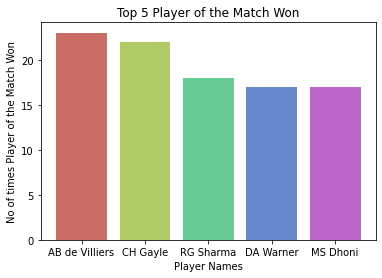

In [ ]:
sns.barplot(MoM_names, Mom_values,palette = np.random.choice(fig_colors))
plt.ylabel('No of times Player of the Match Won')
plt.xlabel('Player Names')
plt.title('Top 5 Player of the Match Won')
plt.plot()

# No. of Matches won by each team

In [ ]:
matches_won_by_each_team = df_matches['winner'].value_counts()
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [ ]:
#merging teams win delhi capital or daredavils
matches_won_by_each_team['Delhi Daredevils'] = matches_won_by_each_team['Delhi Daredevils'] + matches_won_by_each_team['Delhi Capitals']
matches_won_by_each_team['Delhi Daredevils']

86

In [ ]:
matches_won_by_each_team['Pune Warriors'] = matches_won_by_each_team['Pune Warriors'] + matches_won_by_each_team['Rising Pune Supergiant'] +matches_won_by_each_team['Rising Pune Supergiants']
matches_won_by_each_team['Pune Warriors']

27

In [ ]:
#dropping merged index
matches_won_by_each_team.drop(index=['Rising Pune Supergiants', 'Rising Pune Supergiant','Delhi Capitals' ], inplace=True)

In [ ]:
matches_won_by_each_team

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                86
Sunrisers Hyderabad             66
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   27
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [ ]:
#reanming index name
matches_won_by_each_team.rename(index = {'Delhi Daredevils' : 'Delhi Daredevils/Capitals', 'Pune Warriors' : 'Pune Warriors/Rising Pune Supergiants'}, inplace = True)

In [ ]:
matches_won_by_each_team

Mumbai Indians                           120
Chennai Super Kings                      106
Kolkata Knight Riders                     99
Royal Challengers Bangalore               91
Kings XI Punjab                           88
Rajasthan Royals                          81
Delhi Daredevils/Capitals                 86
Sunrisers Hyderabad                       66
Deccan Chargers                           29
Gujarat Lions                             13
Pune Warriors/Rising Pune Supergiants     27
Kochi Tuskers Kerala                       6
Name: winner, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


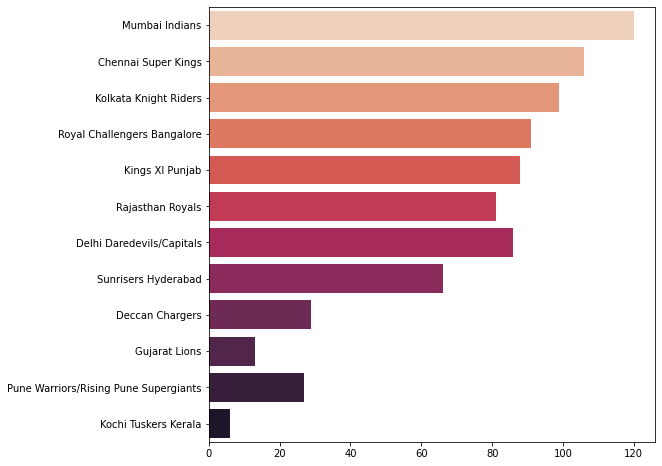

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.barplot(  matches_won_by_each_team[:].tolist(),matches_won_by_each_team.index.tolist(), orient = 'h', palette = np.random.choice(fig_colors))
plt.show()

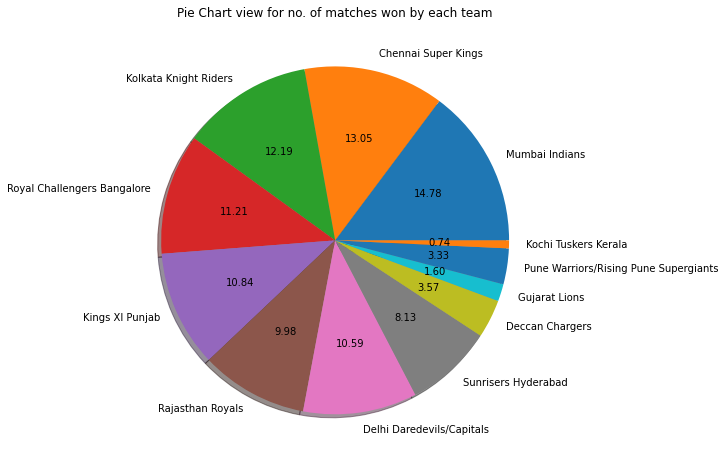

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.pie(matches_won_by_each_team[:],labels = matches_won_by_each_team.index.tolist(), autopct='%.2f', shadow= True)
plt.title('Pie Chart view for no. of matches won by each team')
plt.show()

# Matches Umpired by Umpires

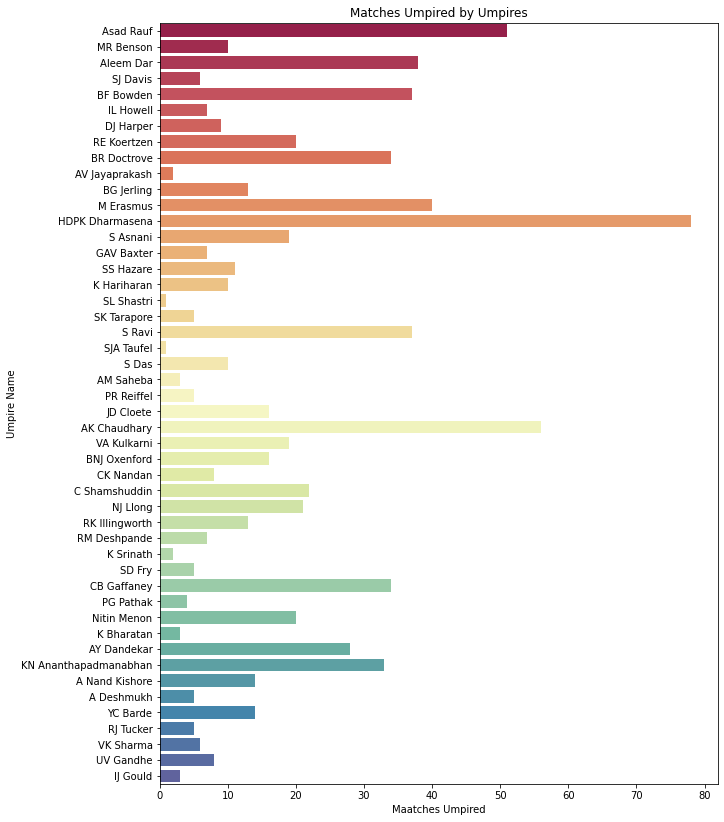

In [ ]:
fig = plt.figure(figsize=(10,14))
sns.countplot(y='umpire1', data = df_matches, orient='v', palette = np.random.choice(fig_colors))
plt.title('Matches Umpired by Umpires')
plt.ylabel('Umpire Name')
plt.xlabel('Maatches Umpired')
plt.show()

# Matches won by Team1 against Team2

In [ ]:
df_matches['team1']

0      Royal Challengers Bangalore
1                  Kings XI Punjab
2                 Delhi Daredevils
3                   Mumbai Indians
4            Kolkata Knight Riders
                  ...             
811    Royal Challengers Bangalore
812                 Mumbai Indians
813    Royal Challengers Bangalore
814                 Delhi Capitals
815                 Delhi Capitals
Name: team1, Length: 816, dtype: object

Total matches played =  27
Matches won by  Mumbai Indians =  17
Win Percentages =  62.96 %


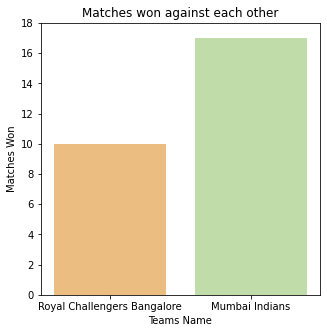

In [ ]:
#matches_won_by_team1_team2

def matches_won_by_team1_team2(team1, team2):
  temp1 = df_matches[ (df_matches['team1'] == team1) & (df_matches['team2']==team2)]
  temp2 = df_matches[ (df_matches['team1'] == team2) & (df_matches['team2']==team1)]

  total_matches = temp1.shape[0] + temp2.shape[0]

  #Matches won by the teams
  matches_won_by_team1 = temp1[temp1['winner'] == team1].shape[0] + temp2[temp2['winner'] == team1].shape[0]

  print('Total matches played = ', total_matches)
  print('Matches won by ', team1 ,'= ',matches_won_by_team1)
  print('Win Percentages = ', round((matches_won_by_team1*100)/total_matches, 2), '%')

  new_df = pd.concat([temp1,temp2], ignore_index = True)

  #plotting
  fig = plt.figure(figsize=(5,5))
  sns.countplot(x = 'winner', data = new_df,dodge= False, palette = np.random.choice(fig_colors))
  plt.ylim(0,18)
  plt.title('Matches won against each other')
  plt.xlabel('Teams Name')
  plt.ylabel('Matches Won')
  plt.plot()

matches_won_by_team1_team2('Mumbai Indians', 'Royal Challengers Bangalore')

In [ ]:
df_matches.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

# Matches Won by Chasing

496
273
223
Percentage of matches won by chasing : 55.04 %


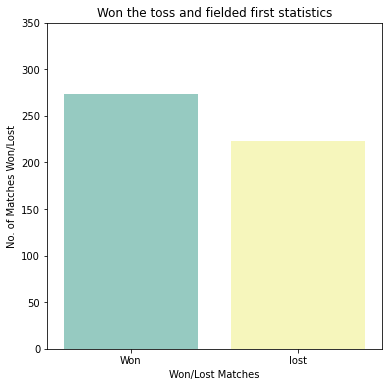

In [ ]:
temp3 = df_matches[df_matches['toss_decision'] == 'field']
tot_matches_played_chasing = temp3.shape[0]
print(tot_matches_played_chasing)
temp3 = temp3[temp3['toss_winner'] == temp3['winner']]
won_by_chasing = temp3.shape[0]
print(won_by_chasing)
lost_by_chasing = tot_matches_played_chasing - won_by_chasing
print(lost_by_chasing)
print('Percentage of matches won by chasing :',round((won_by_chasing*100)/tot_matches_played_chasing,2), '%')


plt.figure(figsize= (6,6))
sns.barplot(x = ['Won', 'lost'], y = [won_by_chasing, lost_by_chasing] , palette = np.random.choice(fig_colors))
plt.xlabel('Won/Lost Matches')
plt.ylabel('No. of Matches Won/Lost')
plt.title('Won the toss and fielded first statistics')
plt.ylim(0,350)
plt.show()

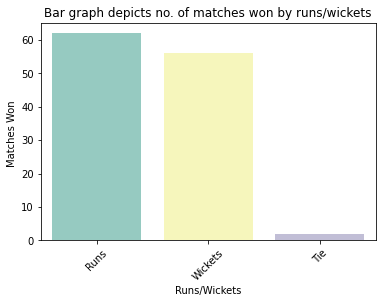

In [ ]:
#Each team statistics for chasing

def matches_won_by_runs_wickets(team_name):
  temp5 = df_matches[df_matches['team1'] == team_name]
  temp5 = temp5[temp5['winner'] == temp5['team1']]
  temp6 = df_matches[df_matches['team2'] == team_name]
  temp6 = temp6[temp6['winner'] == temp6['team2']]

  temp7 = pd.concat([temp5, temp6],ignore_index = True)
  sns.countplot(x ='result', data = temp7, dodge=False, palette = np.random.choice(fig_colors))
  plt.title('Bar graph depicts no. of matches won by runs/wickets')
  plt.xlabel('Runs/Wickets')
  plt.ylabel('Matches Won ')
  plt.xticks([0,1,2],['Runs', 'Wickets', 'Tie'], rotation = 45)
  plt.show()

matches_won_by_runs_wickets('Mumbai Indians')

[]

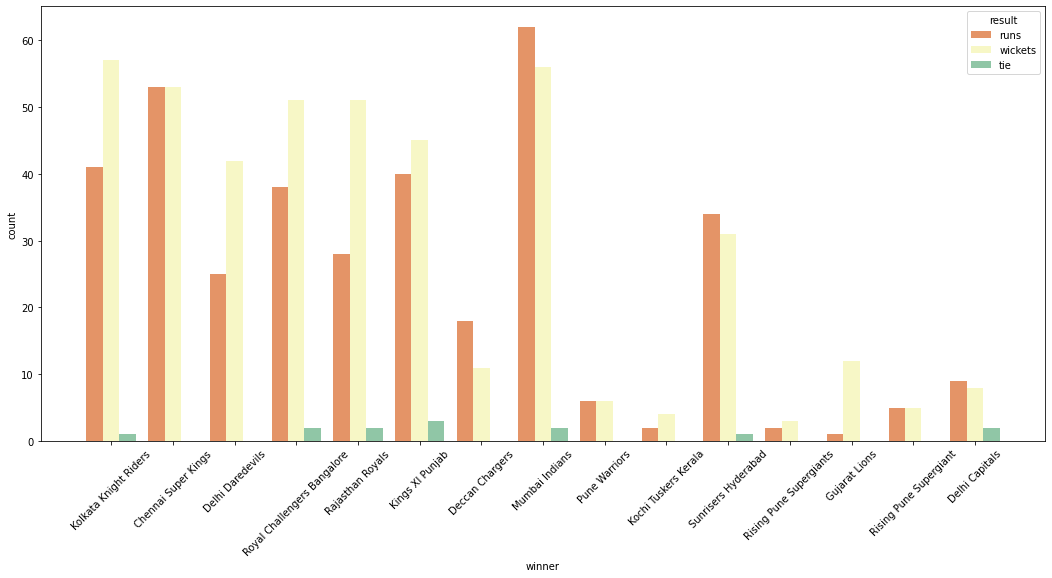

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x='winner', hue='result', data = df_matches, palette=np.random.choice(fig_colors))
plt.xticks(rotation = 45)
plt.plot()

In [ ]:
%%writefile IPL_EDA_DashBoard.py
import streamlit as st
st.title('IPL Data Analysis Tool')
choices = st.sidebar.radio('*Navigation*', ['Home', 'Matches Statistics', 'Player Statistics'])
if choices == 'Home':
  st.write('Home Page')
elif choices == 'Matches Statistics':
  st.write('Matches page')
elif choices== 'Player Statistics' :
  st.write('Players')


Writing IPL_EDA_DashBoard.py


# Loading ball by ball players data

In [ ]:
df_ball = pd.read_csv('/content/drive/My Drive/DataSet/IPL Ball-by-Ball 2008-2020.csv')

In [ ]:
df_ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
df_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
#droping irrelevant columns
df_ball.drop(columns = ['inning','over', 'ball' , 'extra_runs', 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type'], inplace = True)
df_ball.columns

Index(['id', 'batsman', 'non_striker', 'bowler', 'batsman_runs', 'total_runs',
       'non_boundary', 'is_wicket', 'batting_team', 'bowling_team'],
      dtype='object')

In [ ]:
#ball played and total runs score
temp8 = df_ball[df_ball['batsman'] == 'MS Dhoni']
balls_faced = temp8.shape[0]
total_runs = temp8['batsman_runs'].sum()
total_runs

4632

In [ ]:
#total matches

matches_played =  temp8['id'].nunique()
matches_played

182

In [ ]:
four_six = temp8['batsman_runs'].value_counts()
four_six

1    1409
0    1225
2     315
4     313
6     216
3      15
Name: batsman_runs, dtype: int64

In [ ]:
dotted_balls_percentage = round((four_six[0]/balls_faced)*100,2)
dotted_balls_percentage


35.07

In [ ]:
strike_rate = round((total_runs/balls_faced)*100,2)
strike_rate

132.61

In [ ]:
average_score = round((total_runs/matches_played), 2)
average_score

25.45

In [ ]:
def players_stats(player_name):
  temp8 = df_ball[df_ball['batsman'] == player_name]
  balls_faced = temp8.shape[0]
  total_runs = temp8['batsman_runs'].sum()
  
  matches_played =  temp8['id'].nunique()
  four_six = temp8['batsman_runs'].value_counts()
  sixs = 0
  fours = 0
  runs_index = four_six.index.tolist()
  if 4 in runs_index:
    fours = four_six[4]
  if 6 in runs_index:
    sixs = four_six[6]
  
  dotted_balls = 0
  if 0 in runs_index:
    dotted_balls = four_six[0]
  dotted_balls_percentage = round((dotted_balls/balls_faced)*100,2)
  strike_rate = round((total_runs/balls_faced)*100,2)
  average_score = round((total_runs/matches_played), 2)

  return [player_name,matches_played, total_runs, balls_faced,strike_rate, average_score,dotted_balls_percentage,fours, sixs]

players_stats('B Stanlake')


['B Stanlake', 1, 5, 2, 250.0, 5.0, 0.0, 1, 0]

In [ ]:
temp8 = df_ball[df_ball['batsman'] == 'B Stanlake']
temp8

,id,batsman,non_striker,bowler,batsman_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
151961,1136567,B Stanlake,DJ Hooda,BCJ Cutting,1,1,0,0,Sunrisers Hyderabad,Mumbai Indians
151963,1136567,B Stanlake,DJ Hooda,BCJ Cutting,4,4,0,0,Sunrisers Hyderabad,Mumbai Indians


In [ ]:
temp9 = df_ball.groupby('batsman')['batsman_runs'].sum()
(temp9)

batsman
A Ashish Reddy     280
A Chandila           4
A Chopra            53
A Choudhary         25
A Dananjaya          4
                  ... 
YV Takawale        192
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2750
Z Khan             117
Name: batsman_runs, Length: 537, dtype: int64

In [ ]:
temp9.sort_values(ascending = False)

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
                  ... 
IC Pandey            0
S Kaushik            0
ND Doshi             0
V Pratap Singh       0
Abdur Razzak         0
Name: batsman_runs, Length: 537, dtype: int64

In [ ]:
top_5_batsmans = ['V Kohli','SK Raina', 'DA Warner', 'RG Sharma', 'S Dhawan']

In [ ]:
player_name_list = temp9.index.tolist()
player_name_list[:20]

['A Ashish Reddy',
 'A Chandila',
 'A Chopra',
 'A Choudhary',
 'A Dananjaya',
 'A Flintoff',
 'A Kumble',
 'A Mishra',
 'A Mithun',
 'A Mukund',
 'A Nehra',
 'A Nortje',
 'A Singh',
 'A Symonds',
 'A Uniyal',
 'A Zampa',
 'AA Bilakhia',
 'AA Chavan',
 'AA Jhunjhunwala',
 'AA Noffke']

In [ ]:
players_data_2d_list = []

for name in player_name_list:
  #print(name)
  ret_data = players_stats(name)
  players_data_2d_list.append(ret_data)


In [ ]:
#creating dataframe for players statistics
columns_names = ['name','matches_played', 'total_runs', 'balls_faced' ,'strike_rate', 'average_score','dotted_balls_percentage','fours', 'sixs']
import pandas as pd

players_stats_df = pd.DataFrame(data = players_data_2d_list, columns=columns_names)

players_stats_df

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
0,A Ashish Reddy,23,280,196,142.86,12.17,31.12,16,15
1,A Chandila,2,4,7,57.14,2.00,42.86,0,0
2,A Chopra,6,53,75,70.67,8.83,60.00,7,0
3,A Choudhary,3,25,20,125.00,8.33,20.00,1,1
4,A Dananjaya,1,4,5,80.00,4.00,40.00,0,0
...,...,...,...,...,...,...,...,...,...
532,YV Takawale,10,192,183,104.92,19.20,54.64,26,3
533,Yashpal Singh,4,47,67,70.15,11.75,58.21,5,0
534,Younis Khan,1,3,7,42.86,3.00,57.14,0,0
535,Yuvraj Singh,126,2750,2205,124.72,21.83,44.26,217,149


In [ ]:
#top 5 scorere
temp10 = players_stats_df.sort_values(by= ['total_runs'], ascending = False)[0:5]
temp10

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
505,V Kohli,184,5878,4609,127.53,31.95,35.26,504,202
438,SK Raina,189,5368,4041,132.84,28.40,34.94,493,194
116,DA Warner,142,5254,3819,137.58,37.00,37.42,510,195
379,RG Sharma,194,5230,4088,127.94,26.96,37.48,458,214
407,S Dhawan,175,5197,4208,123.50,29.70,38.33,591,109


In [ ]:
#top5 strike rate
temp11 = players_stats_df.sort_values(by= ['strike_rate'], ascending = False)[0:5]
temp11

,name,matches_played,total_runs,balls_faced,strike_rate,average_score,dotted_balls_percentage,fours,sixs
72,B Stanlake,1,5,2,250.00,5.00,0.00,1,0
504,Umar Gul,4,39,19,205.26,9.75,42.11,1,5
395,RS Sodhi,1,4,2,200.00,4.00,50.00,1,0
470,Shahid Afridi,9,81,46,176.09,9.00,43.48,7,6
175,I Malhotra,1,7,4,175.00,7.00,0.00,1,0


In [ ]:
#top 5 average score
temp12 = players_stats_df.sort_values(by= ['average_score'], ascending = False)[0:5]
temp12.loc[:, ['name', 'average_score']]

,name,average_score
206,JM Bairstow,37.62
254,LMP Simmons,37.21
116,DA Warner,37.00
232,KL Rahul,36.76
96,CH Gayle,36.43


In [ ]:
# top5 players with sixs
temp13 = players_stats_df.sort_values(by= ['sixs'], ascending = False)[0:5]
temp13.loc[:, ['name', 'sixs']]

,name,sixs
96,CH Gayle,349
24,AB de Villiers,235
301,MS Dhoni,216
379,RG Sharma,214
505,V Kohli,202


In [ ]:
#top 5 players with fours
temp14 = players_stats_df.sort_values(by= ['fours'], ascending = False)[0:5]
temp14.loc[:, ['name', 'fours']]

,name,fours
407,S Dhawan,591
116,DA Warner,510
505,V Kohli,504
438,SK Raina,493
154,G Gambhir,492


In [ ]:
#check for a player

def check_player_stats(player_name):
  temp13 = players_stats_df[players_stats_df['name'] == player_name]
  print(temp13)

check_player_stats('SK Raina')

         name  matches_played  total_runs  balls_faced  strike_rate  \
438  SK Raina             189        5368         4041       132.84   

     average_score  dotted_balls_percentage  fours  sixs  
438           28.4                    34.94    493   194  


In [ ]:
# recommendation sysytem for players 



In [ ]:
#bowler name lists
bowler_name_list = df_ball['bowler'].unique().tolist()
bowler_name_list

['AA Noffke',
 'Z Khan',
 'JH Kallis',
 'SB Joshi',
 'CL White',
 'P Kumar',
 'AB Agarkar',
 'SC Ganguly',
 'LR Shukla',
 'I Sharma',
 'AB Dinda',
 'JDP Oram',
 'JR Hopes',
 'MS Gony',
 'K Goel',
 'PP Chawla',
 'WA Mota',
 'IK Pathan',
 'S Sreesanth',
 'B Lee',
 'M Muralitharan',
 'P Amarnath',
 'Joginder Sharma',
 'GD McGrath',
 'B Geeves',
 'SK Warne',
 'YK Pathan',
 'D Salunkhe',
 'SR Watson',
 'SK Trivedi',
 'DL Vettori',
 'MF Maharoof',
 'MM Patel',
 'R Bhatia',
 'B Akhil',
 'R Vinay Kumar',
 'A Nehra',
 'SM Pollock',
 'DS Kulkarni',
 'AM Nayar',
 'Harbhajan Singh',
 'ST Jayasuriya',
 'WPUJC Vaas',
 'RP Singh',
 'SB Styris',
 'SB Bangar',
 'DJ Hussey',
 'Mohammad Hafeez',
 'M Kartik',
 'PP Ojha',
 'A Symonds',
 'Pankaj Singh',
 'Mohammad Asif',
 'VY Mahesh',
 'Shahid Afridi',
 'MA Khote',
 'DJ Bravo',
 'VS Yeligati',
 'D Kalyankrishna',
 'VRV Singh',
 'A Kumble',
 'Sohail Tanvir',
 'DNT Zoysa',
 'SD Chitnis',
 'Shoaib Malik',
 'Yuvraj Singh',
 'DW Steyn',
 'JA Morkel',
 'CRD Ferna

In [ ]:
temp15 = df_ball[ df_ball['bowler'] == 'PJ Cummins' ]
temp15 =  temp15[temp15['batsman'] == 'SK Raina' ]
temp15

,id,batsman,non_striker,bowler,batsman_runs,total_runs,non_boundary,is_wicket,batting_team,bowling_team
105579,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105580,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105581,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105582,734023,SK Raina,BB McCullum,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105646,734023,SK Raina,F du Plessis,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105647,734023,SK Raina,F du Plessis,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders
105670,734023,SK Raina,F du Plessis,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders
105672,734023,SK Raina,MS Dhoni,PJ Cummins,0,0,0,0,Chennai Super Kings,Kolkata Knight Riders
105673,734023,SK Raina,MS Dhoni,PJ Cummins,1,1,0,0,Chennai Super Kings,Kolkata Knight Riders
111075,829723,SK Raina,BB McCullum,PJ Cummins,0,1,0,0,Chennai Super Kings,Kolkata Knight Riders


In [ ]:
#total runs against bowler
temp15['total_runs'].sum()

20

In [ ]:
# bowler took wickets for the batsman
temp15['is_wicket'].sum()

1

In [ ]:
#total matches played aginst the bowler
temp15['id'].nunique()

4

In [ ]:
#total balls faced 
temp15.shape[0]

19

In [ ]:
#per over avrage score, calculation method = runs per ball * 6
round((temp15['total_runs'].sum()/temp15.shape[0])*6,2)

6.32

In [ ]:
def batsman_against_bowler(batsman_name, bowler_name):
  temp15 = df_ball[ df_ball['bowler'] == bowler_name ]
  temp15 =  temp15[temp15['batsman'] == batsman_name ]
  total_balls_faced = temp15.shape[0]
  if total_balls_faced == 0:
    return []

  four_six = temp15['batsman_runs'].value_counts()
  sixs = 0
  fours = 0
  runs_index = four_six.index.tolist()
  if 4 in runs_index:
    fours = four_six[4]
  if 6 in runs_index:
    sixs = four_six[6]
  total_runs = temp15['total_runs'].sum()
  is_wicket = temp15['is_wicket'].sum()
  total_matches_played = temp15['id'].nunique()
  total_balls_faced = temp15.shape[0]
  avg_per_over = round((total_runs/total_balls_faced)*6,2)

  return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]


batsman_against_bowler('SK Raina', 'Mohammed Siraj')


[3, 16, 1, 12, 1, 1]

In [ ]:
df_matches.sort_values(by = ['date'], ascending = False).head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
759,1216495,Sharjah,2020-11-03,S Nadeem,Sharjah Cricket Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,C Shamshuddin,RK Illingworth


# Dream 11 Team recommendation system

In [ ]:
# teams players collection using atch id to fetch a team players based on 2020 IPL teams
temp16 = df_ball[ df_ball['id'] == 1216517 ]
team1 = temp16['batting_team'].unique()[0]
team2 = temp16['bowling_team'].unique()[0]
batsman_list = temp16 [temp16['batting_team'] == team1]['batsman'].unique().tolist()
bowler_list = temp16 [temp16['bowling_team'] == team1]['bowler'].unique().tolist()
(batsman_list + bowler_list)
for bowler in bowler_list:
  if bowler not in batsman_list:
    batsman_list.append(bowler)
batsman_list

['KH Pandya',
 'Q de Kock',
 'RG Sharma',
 'SA Yadav',
 'Ishan Kishan',
 'HH Pandya',
 'KA Pollard',
 'NM Coulter-Nile',
 'RD Chahar',
 'JJ Bumrah',
 'TA Boult']

# Teams with player names

In [ ]:
MI = ['KH Pandya','Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','HH Pandya','KA Pollard','NM Coulter-Nile','RD Chahar','JJ Bumrah','TA Boult']
SRH = ['DA Warner','JM Bairstow','MK Pandey','Abdul Samad','KS Williamson','PK Garg','Abhishek Sharma','Sandeep Sharma','KK Ahmed','T Natarajan','Rashid Khan']
CSK = ['F du Plessis','AT Rayudu','SM Curran','DL Chahar','RD Gaikwad','MS Dhoni','SN Thakur','Imran Tahir','N Jagadeesan','RA Jadeja','JR Hazlewood']
KXIPB = ['KL Rahul','CH Gayle','N Pooran','Mandeep Singh','DJ Hooda','JDS Neesham','CJ Jordan','MA Agarwal','Mohammed Shami','Ravi Bishnoi','M Ashwin']
KKR = ['EJG Morgan', 'AD Russell', 'PJ Cummins', 'RA Tripathi', 'KD Karthik', 'KL Nagarkoti', 'Shubman Gill', 'N Rana','SP Narine','Shivam Mavi','CV Varun']
RR = ['RV Uthappa','BA Stokes','SV Samson','JC Buttler','SPD Smith','R Tewatia', 'JC Archer', 'Kartik Tyagi', 'S Gopal','JD Unadkat']
DC = ['SS Iyer','RR Pant','SO Hetmyer', 'AR Patel', 'MP Stoinis', 'AM Rahane', 'S Dhawan','R Ashwin', 'K Rabada','A Nortje','P Dubey']
RCB = ['V Kohli','D Padikkal','AJ Finch', 'AB de Villiers', 'MM Ali', 'S Dube', 'Washington Sundar','NA Saini','Mohammed Siraj','A Zampa','YS Chahal']


In [ ]:
#function to collect team1 stats against team2 bowlers

def team_batting_stats(team1,team2):
  player_stats_list = []

  for batsman in team1:
    batsman_stats = []
    for bowler in team2:
      #result is in the form of   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      result = batsman_against_bowler(batsman, bowler)
      if len(result)>0:
        if len(batsman_stats)>0:
          batsman_stats = list(np.add(batsman_stats,result))
        else:
          batsman_stats = result

    #run_rate = round((total_runs/total_balls_faced)*6,2)
    if len(batsman_stats) > 0:
      run_rate =   round((batsman_stats[1]/batsman_stats[3])*6,2)
      strike_rate = round((batsman_stats[1]/batsman_stats[3])*100,2)

      player_stats_list.append([batsman] + batsman_stats + [ run_rate, strike_rate])

  return player_stats_list



In [ ]:
def team_bowling_stats(team1,team2):
  player_stats_list = []

  for bowler in team1:
    bowler_stats = []
    for batsman in team2:
      result = batsman_against_bowler(batsman, bowler)
      #result format   return [total_matches_played, total_runs,is_wicket, total_balls_faced,fours,sixs]
      if len(result)>0:
        if len(bowler_stats)>0:
          bowler_statss = list(np.add(bowler_stats,result))
        else:
          bowler_stats = result

    if len(bowler_stats) > 0:
      economy =   round((bowler_stats[1]/bowler_stats[3])*6,2)
      player_stats_list.append([bowler] + bowler_stats + [ economy])

  return player_stats_list


In [ ]:
team1_batting_stats = pd.DataFrame(data = team_batting_stats(MI, CSK), columns = ['Name', 'Matches', 'Runs','Out','Balls Played','fours','sixs' ,'Run Rate', 'Strike Rate'])
team2_batting_stats = pd.DataFrame(data = team_batting_stats(CSK, MI),columns = ['Name', 'Matches', 'Runs','Out','Balls Played' ,'fours','sixs','Run Rate', 'Strike Rate'] )
print(team1_batting_stats)
print(team2_batting_stats)

           Name  Matches  Runs  Out  Balls Played  fours  sixs  Run Rate  \
0     KH Pandya       13    74    4            48      6     3      9.25   
1     Q de Kock       18   141    4           109     10     8      7.76   
2     RG Sharma       39   240    6           199     18     7      7.24   
3      SA Yadav       25   166    4           144     23     1      6.92   
4  Ishan Kishan       18   122    5            82     12     6      8.93   
5     HH Pandya       18    61    3            46      3     4      7.96   
6    KA Pollard       21   215    4           109     11    20     11.83   
7     RD Chahar        2     1    1             4      0     0      1.50   
8     JJ Bumrah        2     7    0             5      0     0      8.40   
9      TA Boult        2     6    2             4      0     1      9.00   

   Strike Rate  
0       154.17  
1       129.36  
2       120.60  
3       115.28  
4       148.78  
5       132.61  
6       197.25  
7        25.00  
8       14

In [ ]:
team1_bowling_stats = pd.DataFrame(data = team_bowling_stats(MI, CSK), columns = ['Name', 'Matches', 'Runs','wickets','Balls','fours','sixs' ,'Economy'])
team2_bowling_stats = pd.DataFrame(data = team_bowling_stats(CSK, MI),columns = ['Name', 'Matches', 'Runs','wickets','Balls' ,'fours','sixs','Economy' ])
print(team1_bowling_stats)
print(team2_bowling_stats)

              Name  Matches  Runs  wickets  Balls  fours  sixs  Economy
0        KH Pandya        3    30        1     21      3     1     8.57
1        RG Sharma        1     8        0      7      1     0     6.86
2        HH Pandya        1     2        0      2      0     0     6.00
3       KA Pollard        3     9        0     10      0     0     5.40
4  NM Coulter-Nile        3    17        0     12      3     0     8.50
5        RD Chahar        2    14        1     13      1     0     6.46
6        JJ Bumrah        5    39        0     27      4     2     8.67
7         TA Boult        6    35        2     36      6     0     5.83
           Name  Matches  Runs  wickets  Balls  fours  sixs  Economy
0     SM Curran        2     5        1      8      0     0     3.75
1     DL Chahar        8    84        2     61      8     5     8.26
2     SN Thakur        4     7        2      9      0     0     4.67
3   Imran Tahir        7    59        2     33      5     3    10.73
4     R